In [48]:
import  pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rdata=pd.read_csv("C:/Users/venkatesh/Downloads/winequality.csv")

In [49]:
rdata

,fixed_acidity,volatile_acidity,citric_acid,residual _sugar,chlorides,free _sulfur _dioxide,total _sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


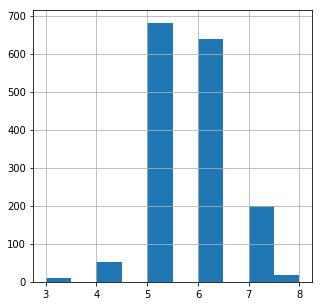

In [50]:
rdata['quality'].hist(figsize=(5,5))
plt.show()

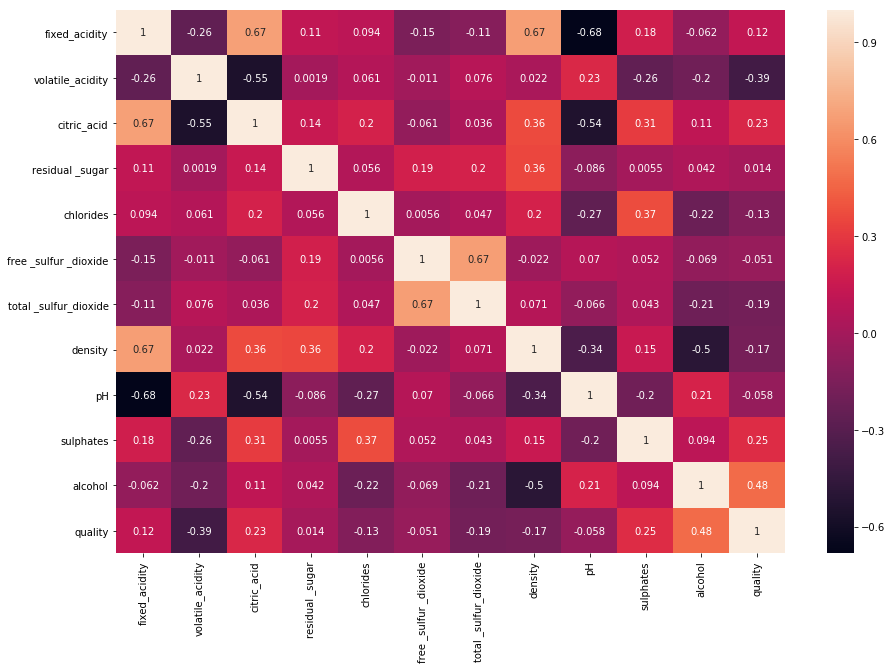

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(rdata.corr(),annot=True)

In [52]:
rdata['quality'].replace([3,4,5,6,7,8],[0,0,0,1,1,1],inplace = True)#1 indiactes satisfactory
rdata

,fixed_acidity,volatile_acidity,citric_acid,residual _sugar,chlorides,free _sulfur _dioxide,total _sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0


In [53]:
rdata.isnull().values.any()

False

In [54]:
rdata.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual _sugar,chlorides,free _sulfur _dioxide,total _sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


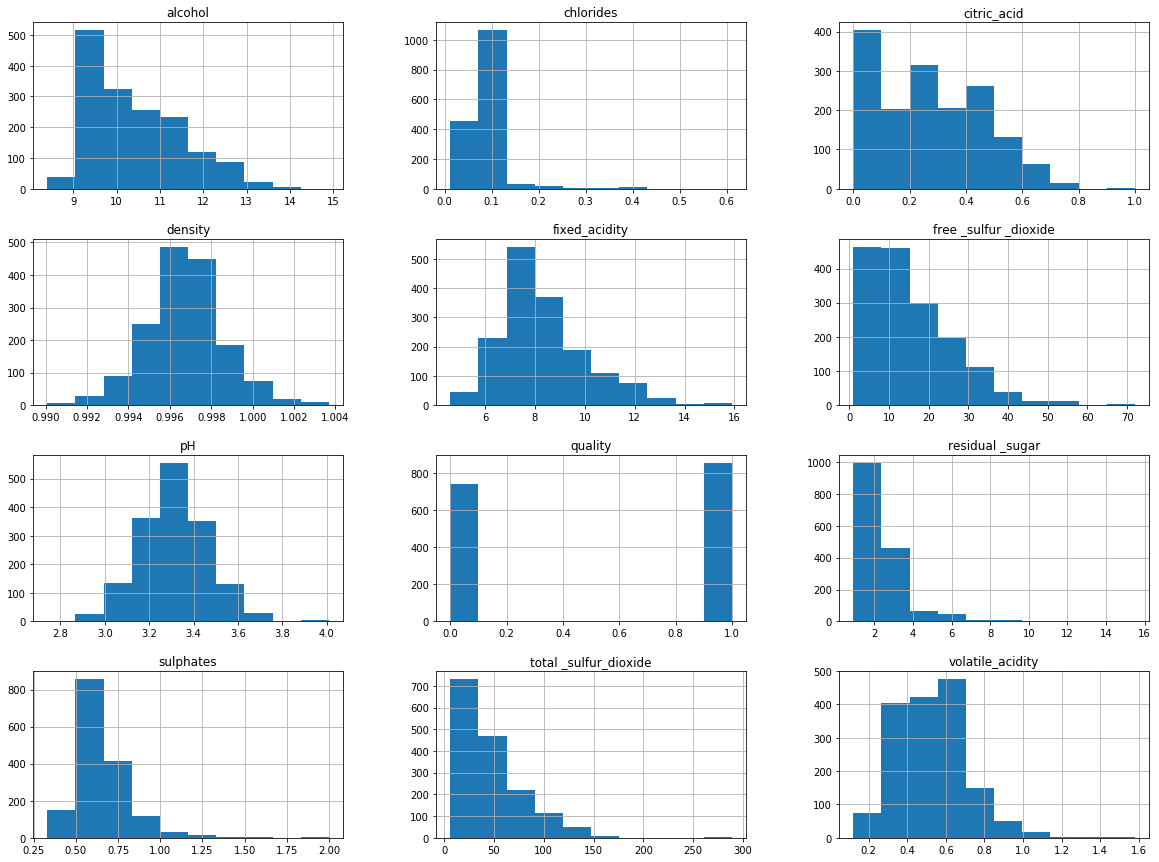

In [55]:
rdata.hist(figsize=(20,15))
plt.show()

In [56]:
rdata['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [57]:
array=rdata.values
X=array[:,0:11]
y=array[:,11]

In [58]:
new=rdata.head(1)

In [59]:
array=rdata.values
X=array[:,0:11]
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [60]:
from sklearn.metrics import f1_score
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
seed = 7

model = KNeighborsClassifier()
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print(score)


0.611111111111111


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=0)
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# predict
y_pred = dtc.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print(score)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_2 = gnb.predict(X_test)
score_2 = f1_score(y_pred_2, y_test)
print(score_2)

0.781818181818182
0.7485380116959064


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Decision Tree Classifier
lgc=LogisticRegression()
lgc.fit(X_train, y_train)
# predict
y_pred = lgc.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print(score)

0.7770114942528736


In [65]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 45
num_trees = 57
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# random forest  Classifier
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print(score)

0.8256880733944956


In [64]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 45
num_trees = 57
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# random forest  Classifier
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
# predict
y_pred = model.predict([[7.8,0.110,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1]])
# f1 score

print(y_pred)

[1.]
